# **Atividade: Workshop Excel ao Pandas**

O notebook a seguir é referente aos exercícios a serem realizados após o workshop de Pandas. 

**Antes de realizar a sua atividade, clique File > Save a Copy in Drive (Salvar uma Cópia no Drive)**

Você faz parte de uma consultoria de negócios e foi contratado pela *Bikes S.A* para realizar uma breve análise dos negócios e responder a algumas questões, desenvolvendo a estratégia de negócios para a próxima temporada 

### **Exercício 1**
Vamos carregar nosso dataset e entender um pouco sobre ele. 

In [ ]:
# Importe o pacote Pandas para a sessão (Lembre-se que, caso precise instalar, use o comando !pip install nome-do-pacote)
import pandas as pd

In [ ]:
# Carregue o dataset

# Importar o arquivo do seu computador para o Google Colab
from google.colab import files
uploaded = files.upload() 

Saving SeoulBikeData.csv to SeoulBikeData (1).csv


In [ ]:
# Importar o arquivo do Google Colab para o notebook
# O arquivo contém caracteres especiais de anotação de graus Celsius. Basta removê-los no excel ou bloco de notas para abrir o arquivo. 
# Remova os caracteres especiais de anotação de graus Celsius --> ° de Dew point temperature(°C) e Temperature(°C)
# OU
# Usar o encoding ISO. df = pd.read_csv('/content/SeoulBikeData.csv', encoding='ISO-8859-1')

import io
df = pd.read_csv(io.BytesIO(uploaded['SeoulBikeData.csv']), encoding='ISO-8859-1')

In [ ]:
# Verifique as primeiras 5 linhas com o método head
df.head()

,Date,Rented Bike Count,Hour,Temperature(Celsius),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ï¿½C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Verifique o tipo de arquivo importado
type(df)

pandas.core.frame.DataFrame

In [ ]:
# Verifique as informações (info) do arquivo importado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         8760 non-null   object 
 1   Rented Bike Count            8760 non-null   int64  
 2   Hour                         8760 non-null   int64  
 3   Temperature(Celsius)         8760 non-null   float64
 4   Humidity(%)                  8760 non-null   int64  
 5   Wind speed (m/s)             8760 non-null   float64
 6   Visibility (10m)             8760 non-null   int64  
 7   Dew point temperature(ï¿½C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)      8760 non-null   float64
 9   Rainfall(mm)                 8760 non-null   float64
 10  Snowfall (cm)                8760 non-null   float64
 11  Seasons                      8760 non-null   object 
 12  Holiday                      8760 non-null   object 
 13  Functioning Day   

**Execute a célula abaixo antes de seguir para o próximo exercício**

In [ ]:
# Apenas execute esta célula para criar duas novas colunas com mês e ano.
df['Date'] = pd.to_datetime(df.Date)
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month

### **Exercício 2**
Agora que sabemos um pouco mais sobre nosso dataset, vamos extrair alguns insights dos dados.

In [ ]:
# Visualizando a tabela
df.head(2)

,Date,Rented Bike Count,Hour,Temperature(Celsius),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ï¿½C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1


In [ ]:
# Agrupe a tabela por ano e faça a soma das vendas por ano
df.groupby('Year')['Rented Bike Count'].sum()

Year
2017     185330
2018    5986984
Name: Rented Bike Count, dtype: int64

In [ ]:
# Agrupe a tabela por Estação (Seasons) e faça a soma das vendas por estação
df.groupby('Seasons')['Rented Bike Count'].sum()

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

In [ ]:
# Agrupe a tabela por Mês e tire a média (mean) das vendas por mês
df.groupby('Month')['Rented Bike Count'].mean().round(2)

Month
1     386.08
2     393.02
3     611.61
4     772.53
5     895.09
6     981.57
7     929.22
8     825.52
9     693.51
10    842.73
11    685.29
12    419.05
Name: Rented Bike Count, dtype: float64

### **Comente quais foram os insights que você pôde perceber nesses números?**
* Estamos em tendência de alta ou baixa?

  Resposta: Estamos em tendência de alta
* Qual é a melhor estação?

  Resposta:  Summer (Verão) é a melhor estação
* Qual mês, em média, é melhor?

  Resposta: Junho (06) é o melhor mês na média


### **Exercício 3**
Vamos criar algumas visualizações gráficas com o Pandas

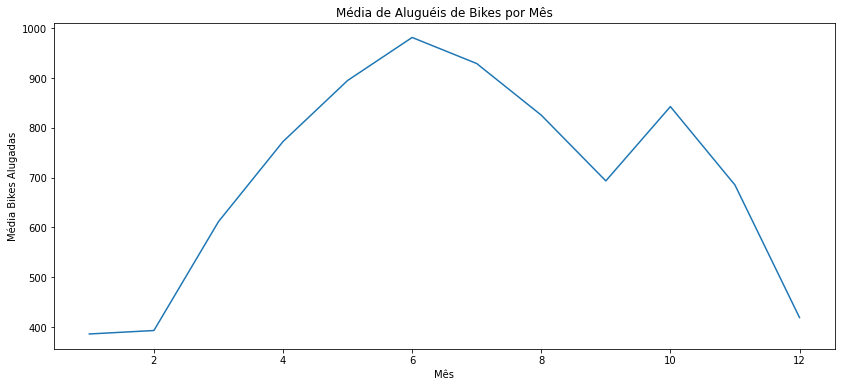

In [ ]:
# Faça um gráfico (plot) em linha do agrupamento de Bikes alugadas por mês usando a média (mean) como função de agregação
df.groupby('Month')['Rented Bike Count'].mean().plot(title='Média de Aluguéis de Bikes por Mês',
                                                  xlabel='Mês', 
                                                  ylabel='Média Bikes Alugadas',
                                                  figsize=(14,6));

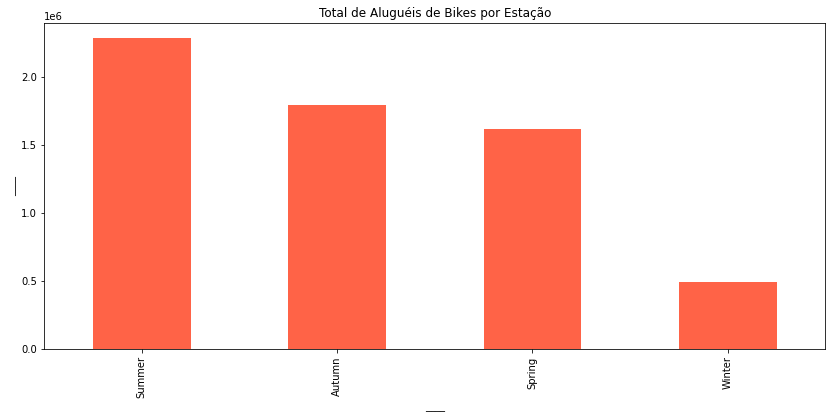

In [ ]:
# Faça um gráfico (plot) em barras do agrupamento de Bikes alugadas por Season usando a Soma como função de agregação

# Criando uma variável com o agrupamento e organizando os dados do maior para o menor (Caso queira ver o resultado do agrupamento, execute agg_by_season em uma célula separada)
agg_by_season = df.groupby('Seasons')['Rented Bike Count'].sum().sort_values(ascending=False)

# Criar o gráfico de barras
agg_by_season.plot.bar(title='Total de Aluguéis de Bikes por Estação',
                                                  xlabel='____', 
                                                  ylabel='____',
                                                  figsize=(14,6),
                                                  color='tomato');

### **Exercício 4**
Em nosso último exercício, vou propor um desafio.

A **correlação** é uma medida estatística que consegue medir qual é a força da relação entre duas variáveis numéricas. Deste modo, é possível medir quais são as variáveis do nosso dataset que mais influenciam o aluguel de Bikes.

[A *correlação* é um número que varia entre 1 e -1](https://pt.wikipedia.org/wiki/Correla%C3%A7%C3%A3o). Sempre que este número se aproxima dos extremos 1 ou -1, dizemos que a relação é mais forte entre as variáveis, sendo 1 uma correlação positiva onde a variável A aumenta, B também aumenta e -1 é uma correlação negativa, quando A aumenta e B diminui.

As correlações são mais fracas quanto mais o número se aproxima de zero.

Tendo a documentação do método [df.corr( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html), calcule a correlação entre as variáveis e determine quais podem afetar as vendas do nosso cliente.

In [ ]:
correlacao = df.corr() # Método Pearson é default mas caso precise corr(method='pearson')
correlacao.loc['Rented Bike Count',:]

Rented Bike Count              1.000000
Hour                           0.410257
Temperature(Celsius)           0.538558
Humidity(%)                   -0.199780
Wind speed (m/s)               0.121108
Visibility (10m)               0.199280
Dew point temperature(ï¿½C)    0.379788
Solar Radiation (MJ/m2)        0.261837
Rainfall(mm)                  -0.123074
Snowfall (cm)                 -0.141804
Year                           0.215162
Month                          0.070861
Name: Rented Bike Count, dtype: float64

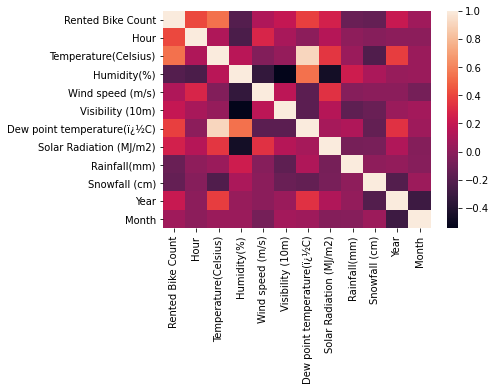

In [ ]:
# Para visualizar o mapa de calor, basta executar o código abaixo
import seaborn as sns
sns.heatmap(correlacao);

## **Qual seria a estratégia que você apresentaria ao cliente?**
* Em quais meses ele deve investir mais ou menos?
* Quais os melhores meses para criar promoções?
* Que variáveis podem afetar mais as vendas do cliente?

Escreva a sua resposta em um parágrafo explicando as suas ações embasadas nos dados coletados das respostas ou de suas próprias análises.

Os meses com as piores médias de aluguel são os 02 primeiros meses do ano e o último mês do ano, sendo assim é interessante começar o investimento no mês 03 com alta até o mês 07 e após diminuir gradativamente até o final/comecinho do ano.
Os melhores meses para promoções são os que possuem a menor média de aluguel (01, 02 e 12). E as variáveis que mais afetam os alugueis são Temperatura e Hora do dia.

OBS: Caso possível, se o professor puder explicar brevemente utilizar cada um dos métodos do corr() como o Pearson, Kendall, Spearman e callable.
